# 12 More Types of Independent Variables.

Independent variables are not always quantitative, linear, or isolated. Some transformations of independent variable is necessary to satisfy a specific model specification - e.g. $y = \beta_0 + \beta_1 x^2$. Some transformations are needed for better meanings - e.g. in $log(y) = \beta_0 + \beta_1 log(x)$, $\beta_1$ can be interpreted as elasticity. In some other cases, a string variable has to be preprocessed to a numerical value to be used in a regression. In this note, we are going to explore several common independent variable transformations.

## 12.1 Dummy variables

Dummy variables are variables taking the values zero or one. If a dummy variable is used in a model, its coefficient represents the difference in the intercept between groups.

$$\beta_D = \frac{\Delta E[y|x]}{\Delta D} = E[y|D=1,x] - E[y|D=0,x], \forall x$$

Fortunately, statsmodels has already done all the calculation for us. We can just use a dummy variable as a numerical variable and modify our interpretation of the estimator.

As an example. Consider that we are interested in the wage differences by gender and regress the hourly wage on a dummy varialbe which is equal to one for females and zero for males. We also include regressors for education, experience, and tenure. 

Exercise: Use wage1 dataset from wooldridge, and use statsmodels to run the regression. How do you interpret the coefficient on female.

In [1]:
import wooldridge as woo
import statsmodels.formula.api as smf

df = woo.data("wage1")

res = smf.ols("wage~female+educ+exper+tenure",data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           7.30e-50
Time:                        12:59:26   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.0

Its estimated coefficient of -1.81 indicates that on average, a woman makes \$1.81 per hour less than a man with the same education, experience, and tenure.

> Instead of transforming Boolean variables into dummies, they can be directly used as regressors. The coefficient is then named varname[T.True] indicating that True was treated as 1.

Exercise: Use exper>5 as a boolean variable - senior - and and rerun a regression of wage on exper and educ.

In [2]:
df["senior"] = df["exper"]>5

In [3]:
res = smf.ols("wage~senior+educ", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     87.42
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.76e-33
Time:                        12:59:26   Log-Likelihood:                -1357.2
No. Observations:                 526   AIC:                             2720.
Df Residuals:                     523   BIC:                             2733.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.2191      0.715     -4.

All else equal, senior employees earn an average of $2.48 more hourly wage than their junior peers

Exercise: Draw two line plots (in the same figure) of the predicted wage against educ - one for senior=True, another for senior=False

> plt.plot() can take variables in a way similar to seaborn, where we specify the column names and the data.

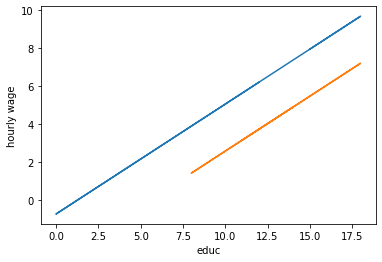

In [4]:
import matplotlib.pyplot as plt
df["y_h"]=res.fittedvalues
plt.plot("educ","y_h", data=df.loc[df["senior"]])
plt.plot("educ","y_h", data=df.loc[~df["senior"]])
#labels
plt.xlabel("educ")
plt.ylabel("hourly wage")
plt.show()

## 12.2 Categorical Variables

Categorical variable is the more general name for dummy variables. A categorical variable can take one of a given set of outcomes. For example, a variable *MobileOS* can take one of four values "Android", "iOS", "Windows", or "other".

Statsmodels can easily transform any variable into a categorical variable using the function **C** in the definition of the formula. The function **ols** is clever enough to implicitly add g-1 dummy variables if the variable has g outcomes. As a reference category, one of the g categories has to be omitted (the first category is left out by default). 

We can choose different reference categories using a second argument of the **C** function, where we provide a new reference group *group_value* with the command **Treatment("group_value")**.

`formula = "y ~ C(x, Treatment('group_value'))"

Example: 
1. use CPS1985.csv from CourseSite. List all possible values of occupation and their frequencies.

In [1]:
import pandas as pd
df = pd.read_csv("cps1985.csv", index_col=0)
df.head()

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes


In [6]:
df["occupation"].value_counts(sort=False)

worker        156
management     55
sales          38
office         97
services       83
technical     105
Name: occupation, dtype: int64

2. Regress wage on education and occupation, see what happens.

In [7]:
res = smf.ols("wage~education + C(occupation)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     25.36
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.69e-26
Time:                        12:59:27   Log-Likelihood:                -1563.6
No. Observations:                 534   AIC:                             3141.
Df Residuals:                     527   BIC:                             3171.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

- Management employees have been omitted as the base category.
- Employees in office positions earn an average $4.42 less hourly wage than otherwise equal management positions.

3. regress wage on education and occupation using office as the base category.

In [3]:
import statsmodels.formula.api as smf
reg = smf.ols("wage~education + C(occupation, Treatment('worker'))", data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     25.36
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.69e-26
Time:                        13:15:24   Log-Likelihood:                -1563.6
No. Observations:                 534   AIC:                             3141.
Df Residuals:                     527   BIC:                             3171.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [4]:
reg.exog_names

['Intercept',
 "C(occupation, Treatment('worker'))[T.management]",
 "C(occupation, Treatment('worker'))[T.office]",
 "C(occupation, Treatment('worker'))[T.sales]",
 "C(occupation, Treatment('worker'))[T.services]",
 "C(occupation, Treatment('worker'))[T.technical]",
 'education']

In [6]:
import re
hypo=[v for v in reg.exog_names if re.search(r"occu",v)]
res.f_test(hypo)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[10.62174891]]), p=9.76496046985938e-10, df_denom=527, df_num=5>

- Office employees have been omitted as the base category.
- Employees in management positions earn an average $4.42 more hourly wage than otherwise equal office positions.

> If a quotation is used inside another quotation, use ' instead of ".

### ANOVA Tables

What would you do if you want to know if the occupation dummies are jointly significant or not? - F test.

In [18]:
var_ls = reg.exog_names
var_ls

['Intercept',
 "C(occupation, Treatment('office'))[T.management]",
 "C(occupation, Treatment('office'))[T.sales]",
 "C(occupation, Treatment('office'))[T.services]",
 "C(occupation, Treatment('office'))[T.technical]",
 "C(occupation, Treatment('office'))[T.worker]",
 'education']

In [24]:
var_ls[1:-1]

["C(occupation, Treatment('office'))[T.management]",
 "C(occupation, Treatment('office'))[T.sales]",
 "C(occupation, Treatment('office'))[T.services]",
 "C(occupation, Treatment('office'))[T.technical]",
 "C(occupation, Treatment('office'))[T.worker]"]

In [26]:
import numpy as np
ftr = ["occupation" in name for name in var_ls]
hypo = list(np.array(var_ls)[ftr])
hypo

["C(occupation, Treatment('office'))[T.management]",
 "C(occupation, Treatment('office'))[T.sales]",
 "C(occupation, Treatment('office'))[T.services]",
 "C(occupation, Treatment('office'))[T.technical]",
 "C(occupation, Treatment('office'))[T.worker]"]

> We can use reg.exog_names to obtain a list of regressor names

In [27]:
res.f_test(hypo)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[10.62174891]]), p=9.76496046985938e-10, df_denom=527, df_num=5>

> In an f_test, "=0" is assumed by default

- We reject the null hypothesis that the occupation dummies are jointly insignificant.

An Type II ANOVA (analsis of variance) table does exactly this for each variable in the model and displays the results in a clearly arranged table. **statsmodels** implement this in the method anova_lm.
```python
import statsmodels.api as sm
sm.stats.anova_lm(res,typ=2)
```

Exercise: generate a type II ANOVA table use the "res" we estimated.

> If you are interested, you can read this [blog](https://www.r-bloggers.com/2011/03/anova-–-type-iiiiii-ss-explained/) for more about ANOVA (SS stands for sum of squares regression).

In [11]:
import statsmodels.api as sm
sm.stats.anova_lm(res,typ=2)

,sum_sq,df,F,PR(>F)
"C(occupation, Treatment('office'))",1100.738677,5.0,10.621749,9.764960e-10
education,616.331599,1.0,29.736938,7.617624e-08
Residual,10922.669849,527.0,NaN,NaN


- The ANOVA table shows that at 5\% significance level, occupation is a significant explanatory variable for wage in this specification.

## 12.3 Interactions

In **statsmodels**, `var1:var2` formula syntax will automatically calculate the interaction (element-wise multiplication) of two variables. And `var1*var2` adds not only the interaction but also both original variables.

Exercise: regress wage on education, experience, and their interaction.

In [12]:
df

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,5.10,8,21,35,hispanic,other,female,worker,manufacturing,no,yes
1,4.95,9,42,57,cauc,other,female,worker,manufacturing,no,yes
2,6.67,12,1,19,cauc,other,male,worker,manufacturing,no,no
3,4.00,12,4,22,cauc,other,male,worker,other,no,no
4,7.50,12,17,35,cauc,other,male,worker,other,no,yes
...,...,...,...,...,...,...,...,...,...,...,...
529,11.36,18,5,29,cauc,other,male,technical,other,no,no
530,6.10,12,33,51,other,other,female,technical,other,no,yes
531,23.25,17,25,48,other,other,female,technical,other,yes,yes
532,19.88,12,13,31,cauc,south,male,technical,other,yes,yes


In [13]:
reg = smf.ols("wage~education*experience", data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     44.89
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           7.28e-26
Time:                        12:59:27   Log-Likelihood:                -1570.8
No. Observations:                 534   AIC:                             3150.
Df Residuals:                     530   BIC:                             3167.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.9520 

### Interpretation: Continuous Variable

If both var1 and var2 are continuous, the coefficient on the interaction term can be interpreted as the effect on the marginal effect (mixed-partial derivatives). In the example above, we have 

$$wage = \beta_0 + \beta_1 education + \beta_2 experience + \beta_3 education*experience + u$$

$$\frac{\partial E[wage|x]}{\partial education} = \beta_1 + \beta_3experience$$

$$\frac{\partial}{\partial experience}(\frac{\partial E[wage|x]}{\partial education}) = \beta_3$$

When experience increase by one year, the partial effect of education on wage are expected to increase by $\beta_3$.

And $\beta_1$ indicates the increase in expected wage when the individual, with 0 experience, receives one more year of education.

> Clairaut's Theorem 
If $(f_x)_y$ and $(f_y)_x$ are both defined and continuous in a region containing the point (a,b) $$(f_x)_y(a,b)=(f_y)_x(a,b)$$

Exercise: draw a 3D plot for $y = 1 + 2x_1 + 3x_2 +4x_1*x_2$

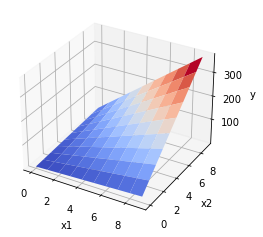

In [28]:
import numpy as np
# new canvas
fig = plt.figure()
# convert to 3D canvas
ax = fig.add_subplot(111, projection='3d') # create a 1 row 1 column grid, draw at the 1st grid

# assume values of x
x1 = range(10)
x2 = range(10)

# meshgrid - create pairs
X1,X2 = np.meshgrid(x1,x2)

#surface plot
Y_h = 1+2*X1+3*X2+4*X1*X2
ax.plot_surface(X1,X2,Y_h, cmap="coolwarm")

#labels
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

#rotate the figure
ax.view_init(azim = -60, elev = 30)  
plt.show()

Exercise: draw a 3D plot for this interacted model. Using the predicted wage as the z-axis, education as x-axis, and experience as the y-axis.

In [ ]:
import numpy as np
b = res.params
b

In [ ]:
# new canvas
fig = plt.figure()
# convert to 3D canvas
ax = fig.add_subplot(111, projection='3d') # create a 1 row 1 column grid, draw at the 1st grid

# assume values of x
x1 = np.linspace(np.min(df["education"]),np.max(df["education"]),10) # there is no need to use observed values of x
x2 = np.linspace(np.min(df["experience"]),np.max(df["experience"]),10)

# meshgrid - create pairs
X1,X2 = np.meshgrid(x1,x2)

#surface plot
Y_h = b[0]+b[1]*X1+b[2]*X2+b[3]*X1*X2
ax.plot_surface(X1,X2,Y_h, cmap="coolwarm")

#labels
ax.set_xlabel("education")
ax.set_ylabel("experience")
ax.set_zlabel("wage")

#rotate the figure
ax.view_init(azim = -60, elev = 30)  
plt.show()

### Interpretation - Dummy Variable - DD model

If both x1 and x2 are dummy variables, the model is called a **Difference-in-Differences** (DD) model.DD is commonly used in analyzing causal effects. To see this, consider we have two dummy variables, D=1 if the individual is in the treatment group, and T=1 if the observation is in the post-treatment period. And we assume the following specification

$$y = \beta_0 + \beta_1 D + \beta_2 T + \beta_3 D*T + u$$

Similar to the continuous case, we have

$$\frac{\Delta}{\Delta T}(\frac{\Delta E[y|x]}{\Delta D}) = \beta_3$$

> we use $\Delta$ instead of $\partial$ because a dummy variable is discrete and not differentiable.

The equation above can be rewritten as (since D and T can only take 2 values)

$$\begin{aligned} 
\beta_3& =\frac{\Delta}{\Delta T}(\frac{\Delta E[y|x]}{\Delta D}) \\
&= \frac{\Delta}{\Delta T}(E[y|D=1,T]-E[y|D=0,T]) \\
&= (E[y|D=1,T=1]-E[y|D=0,T=1]) - (E[y|D=1,T=0]-E[y|D=0,T=0]) \\
\end{aligned}$$

Hence the name difference in differences

$\beta_3$ in this model implies the treatment effect, eliminating the initial treatment-control difference and the common trend experienced by both groups.

Exercise: Assume $y = 1 + 2D + 3T + 4DT +u$, visualize the treatment effect in a 2D scatter plot of y against T.

D    int64
T    int64
y    int64
dtype: object


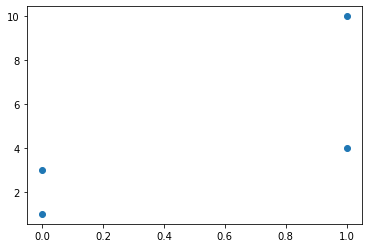

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

D = [0,0,1,1]
T= [0,1,0,1]
df2 = pd.DataFrame({"D":D,"T":T})
df2["y"] = 1+ 2*df2["D"]+ 3*df2["T"]+ 4*df2["D"]*df2["T"]

print(df2.dtypes)

plt.scatter(x=df2["T"], y=df2["y"])



# plt.scatter(x="T", y="y", data=df2.loc[df2["D"]==1])
# plt.scatter(x="T", y="y", data=df2.loc[df2["D"]==0])

plt.show()